<a href="https://colab.research.google.com/github/Armin-Abdollahi/Machine-Learning/blob/main/ML_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

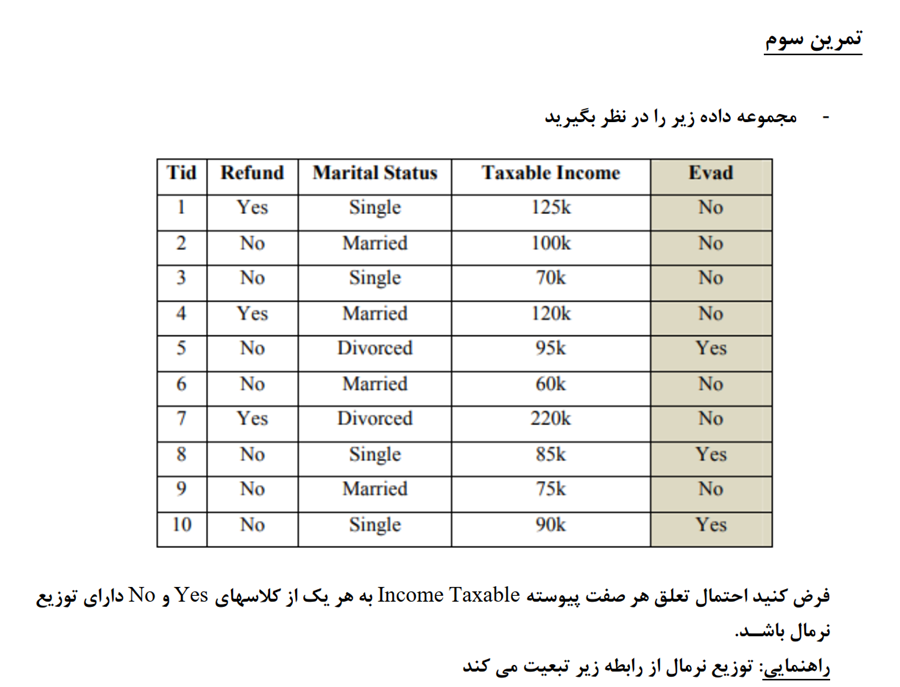

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Predicted Class: No


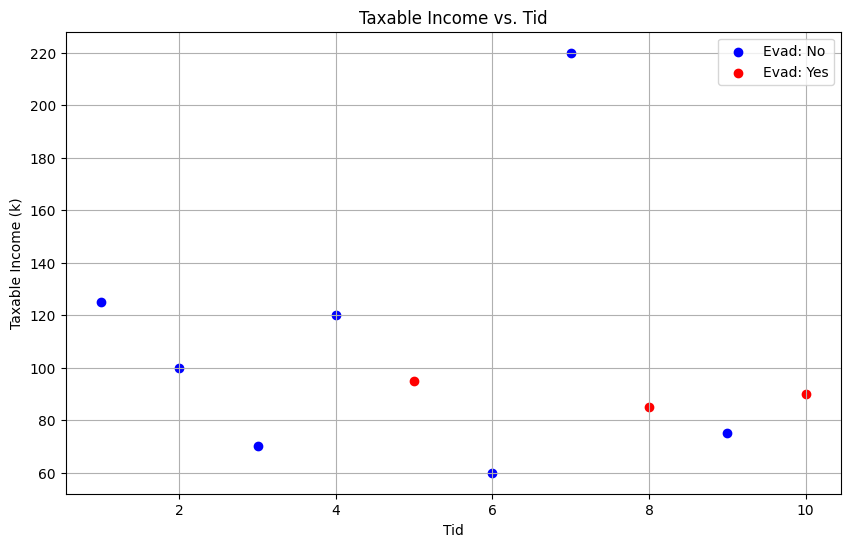

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Dataset definition
data = {
    'Tid': range(1, 11),
    'Refund': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
    'Taxable Income': [125, 100, 70, 120, 95, 60, 220, 85, 75, 90],
    'Marital Status': ['Single', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Single'],
    'Evad': ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert text attributes to numeric
df['Refund'] = df['Refund'].map({'Yes': 1, 'No': 0})
df['Marital Status'] = df['Marital Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
df['Evad'] = df['Evad'].map({'Yes': 1, 'No': 0})

# Divide data into features and labels
X = df[['Refund', 'Taxable Income', 'Marital Status']]
y = df['Evad']

# Create a simple Bayes model
model = GaussianNB()

# Model training
model.fit(X, y)

# Test record definition
test_record = [[1, 80, 1]] # (Refund=Yes, Income=80k, Marital Status=Married)

# Test record class prediction
predicted_class = model.predict(test_record)

# Show result
print("Predicted Class:", "Yes" if predicted_class[0] == 1 else "No")

# Draw a scatter plot
plt.figure(figsize=(10, 6))
colors = {'Yes': 'red', 'No': 'blue'}
for evad in df['Evad'].unique():
    subset = df[df['Evad'] == evad]
    plt.scatter(subset['Tid'], subset['Taxable Income'],
                c=colors['Yes' if evad == 1 else 'No'],
                label=f'Evad: {"Yes" if evad == 1 else "No"}')

plt.title('Taxable Income vs. Tid')
plt.xlabel('Tid')
plt.ylabel('Taxable Income (k)')
plt.legend()
plt.grid(True)
plt.show()